# Projeto 3 - Redes Complexas
    Fernando Soares de Aguiar Neto  (7152184)
    Guiherme Milan Santos           (9012966)

In [87]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import igraph as ig
import sklearn
import sklearn.preprocessing
import sklearn.neighbors
import sklearn.decomposition
warnings.filterwarnings('ignore')

## Exercício 1

Neste exercício, são simuladas redes de três modelos para redes aleatórias, Erdos-Reniy, Watts-Strogatz e Barabasi-Albert. Em seguida, estatísticas como distribuição de graus, grau médio, coeficiente de clustering, transitividade e assortatividade são computadas e então comparadas.

In [88]:
def moment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

def degree_distribution(GER):
    vk = dict(GER.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

def compute_statistics(g, g_type):
    vk = dict(g.degree())
    vk = list(vk.values())
    vk = np.array(vk)
    avg_deg = vk.mean()
    second_m = moment_of_degree_distribution(g, 2)
    short = nx.average_shortest_path_length(g)
    clust = nx.average_clustering(g)
    transit = nx.transitivity(g)
    assort = nx.degree_assortativity_coefficient(g)
    return [len(g), avg_deg, second_m, short, clust, transit, assort, g_type]

def set_ax_fontsize(ax, fontsize):
    ax.title.set_fontsize(fontsize)
    ax.xaxis.label.set_fontsize(fontsize)
    ax.yaxis.label.set_fontsize(fontsize)
    [tick.set_fontsize(fontsize) for tick in ax.get_xticklabels()];
    [tick.set_fontsize(fontsize) for tick in ax.get_yticklabels()];

In [89]:
columns = ['n','<k>','2nd.Mom.','Avg.Short.Path','Avg.Clustering','Transitivity','Assortativity','Model']
columns_avg = ['n','<k>','2nd.Mom.','Avg.Short.Path','Avg.Clustering','Transitivity','Assortativity','Model']
columns_dp = columns_avg
#columns = ['n','<k> médio','<k> DP','2nd.Mom.Médio','2nd.Mom.DP','Avg.Short.Path','Avg.Clustering',
#'Transitivity','Assortativity','Model']

avg_df = pd.DataFrame(columns=columns_avg)
dp_df = pd.DataFrame(columns=columns_avg)

raw_values = pd.DataFrame(columns=columns)
k = 2
n = 500
p = k/(n-1)
for i in range(30):
    er = nx.gnp_random_graph(n=n, p=p, seed=None, directed=False)
    er = sorted(nx.connected_component_subgraphs(er), key = len, reverse=True)[0]
    raw_values.loc[i] = compute_statistics(er, 'Erdos-Reny')
avg_df.loc[0,:] = raw_values.iloc[:,:-1].mean()
avg_df.iloc[0,-1] = 'Erdos-Renyi'
dp_df.loc[0,:] = raw_values.iloc[:,:-1].std()
dp_df.iloc[0,-1] = 'Erdos-Renyi'

n = 500
p = 0.01
k = 10
for i in range(30):
    ws = nx.watts_strogatz_graph(n, k, p, seed=None)
    raw_values.loc[i] = compute_statistics(ws, 'Watts-Strogatz(P=0.01)')
avg_df.loc[1,:] = raw_values.iloc[:,:-1].mean()
avg_df.iloc[1,-1] = 'Watts-Strogatz(P=0.01)'
dp_df.loc[1,:] = raw_values.iloc[:,:-1].std()
dp_df.iloc[1,-1] = 'Watts-Strogatz(P=0.01)'

n = 500
p = 0.1
k = 10
for i in range(30):
    ws = nx.watts_strogatz_graph(n, k, p, seed=None)
    raw_values.loc[i] = compute_statistics(ws, 'Watts-Strogatz(P=0.1)')
avg_df.loc[2,:] = raw_values.iloc[:,:-1].mean()
avg_df.iloc[2,-1] = 'Watts-Strogatz(P=0.1)'
dp_df.loc[2,:] = raw_values.iloc[:,:-1].std()
dp_df.iloc[2,-1] = 'Watts-Strogatz(P=0.1)'

n = 500
p = 0.1
k = 10
for i in range(30):
    ba = nx.barabasi_albert_graph(n, int(k/2))
    raw_values.loc[i] = compute_statistics(ba, 'Barabasi-Albert')
avg_df.loc[3,:] = raw_values.iloc[:,:-1].mean()
avg_df.iloc[3,-1] = 'Barabasi-Albert'
dp_df.loc[3,:] = raw_values.iloc[:,:-1].std()
dp_df.iloc[3,-1] = 'Barabasi-Albert'

avg_df

,n,<k>,2nd.Mom.,Avg.Short.Path,Avg.Clustering,Transitivity,Assortativity,Model
0,397.933,2.41792,7.42889,7.87111,0.00232315,0.00304334,-0.0576072,Erdos-Renyi
1,500,10,100.103,7.34559,0.646752,0.645398,-0.00350274,Watts-Strogatz(P=0.01)
2,500,10,100.978,3.90728,0.490461,0.481393,-0.00934922,Watts-Strogatz(P=0.1)
3,500,9.9,183.122,2.76664,0.0647105,0.0495685,-0.0705534,Barabasi-Albert


A tabela acima contém os valores médios calculados para cada estatística, computadas sobre 30 redes que foram geradas para cada modelo.

In [90]:
dp_df

,n,<k>,2nd.Mom.,Avg.Short.Path,Avg.Clustering,Transitivity,Assortativity,Model
0,16.5153,0.0681669,0.416897,0.427239,0.00279776,0.00304861,0.039385,Erdos-Renyi
1,0,0,0.0173032,0.576054,0.00327158,0.00345951,0.0194494,Watts-Strogatz(P=0.01)
2,0,0,0.078501,0.057811,0.011717,0.0117861,0.0200046,Watts-Strogatz(P=0.1)
3,0,0,6.12108,0.0133425,0.00529197,0.00247455,0.0138341,Barabasi-Albert


A tabela acima contém os valores de desvio padrão calculado para cada estatística, computadas sobre 30 redes geradas para cada modelo.

A rede Erdos-Renyi apresentou desvio padrão maior que 0 no número de nós, o que ocorreu em virtude da necessidade de se extrair o maior componente conexo para o cálculo de algumas dessas medidas. Dado que as conexões são feitas de maneira aleatória, isto implica na perda daqueles nós que não se conectaram ao componente principal, e a quantidade existente desses nós é diferente para cada execução do modelo.

A maior variância está na rede de Barabasi-Albert. Isto faz sentido, dado que a preferência de novos nós por conexões com hubs faz com que, ainda que haja muitos nós com poucas conexões, a existência de alguns superhubs cause maior dispersão na distribuição de graus, refletindo na variância. O menor caminho médio também está na rede de Barabasi-Albert, o que é provável consequência da predominância de hubs que oferecem vias de acesso entre dois nós quaisquer da rede, encurtando o caminho entre eles. A rede de Watts-Strogatz, por meio do efeito Small World, também apresentou distâncias menores curtas.

A rede de Watts Strogatz com probabilidade de rewiring igual a 0.01 também foi responsável pelo maior coeficiente de clustering e transitividade. Isto provavelmente se dá em razão do fato da baixa probabilidade de rewiring manter a estrutura regular da rede próxima de uma topologia em anel. A assortatividade, no entanto, foi mais baixa na rede de Barabasi-Albert, o que é possível reflexo da tendência de nós mais novos (e, portanto, menos conectados) realizarem conexões com hubs (os quais tem grau mais alto), resultando na assortatividade negativa.

78
30


(5, 29.5)

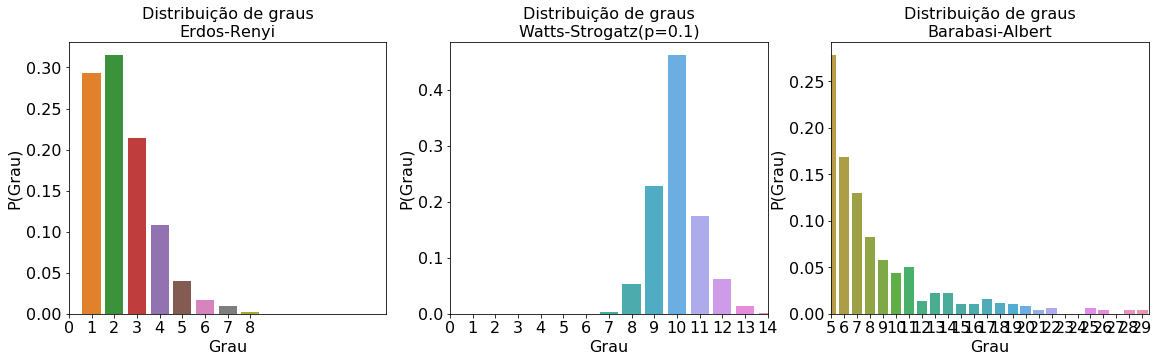

In [91]:
fig, axis = plt.subplots(1,3, figsize=(8,5))

k_er, pk_er = degree_distribution(er)
plt.subplots_adjust(right=2)
axis[0].set_xlabel('Grau')
axis[0].set_ylabel('P(Grau)')
axis[0].set_title('Distribuição de graus\nErdos-Renyi')
set_ax_fontsize(axis[0], 16)
sns.barplot(x=k_er, y=pk_er, ax=axis[0])
#sns.distplot(k_er,ax=axis[0], hist=False)

k_ws, pk_ws = degree_distribution(ws)
axis[1].set_xlabel('Grau')
axis[1].set_ylabel('P(Grau)')
axis[1].set_title('Distribuição de graus\nWatts-Strogatz(p=0.1)')
set_ax_fontsize(axis[1], 16)
sns.barplot(x=k_ws, y=pk_ws, ax=axis[1]);
#sns.distplot(k_ws, ax=axis[1], hist=False);

max_er = max(k_er)
max_ws = max(k_ws)
xlim = max_er if max_er >= max_ws else max_ws

k_ba, pk_ba = degree_distribution(ba)
print(len(pk_ba))
pk_ba = [x for i, x in enumerate(pk_ba) if k_ba[i] < 30]
k_ba = [x for i, x in enumerate(k_ba) if k_ba[i] < 30]
print(len(pk_ba))
axis[2].set_xlabel('Grau')
axis[2].set_ylabel('P(Grau)')
axis[2].set_title('Distribuição de graus\nBarabasi-Albert')
set_ax_fontsize(axis[2], 16)
sns.barplot(x=k_ba, y=pk_ba, ax=axis[2]);
#print(k_ba)
#sns.distplot(k_ba, ax=axis[2], hist=False);

axis[0].set_xlim(xmin=0, xmax=xlim)
axis[1].set_xlim(xmin=0, xmax=xlim)
axis[2].set_xlim(xmin=5)

Pela distribuição de graus, temos que ER e WS não são livres de escala, já BA apresenta comportamente livre de escala. Isso é esperado, pois ER gera arestas com mesma probabilidade, independente do vértice, sem gerar hubs, por sua vez a rede WS apresenta uma variação menor do grau de um vértice, uma vez que seu processo de geração começa com uma rede regular, com possibilidade de "rewiring", poucos vértices se tornarão muito conectados, mantendo a distribuição do grau bem próxima da média. A rede BA, ao contrário das duas anteriores, força a presença de hubs, apresentando uma distribuição livre-de-escala.

Em termos de assortatividade, ER e WS apresentam assortatividade próxima de 0, uma vez que a probabilidade de existir arestas não depende do grau do vértice, i.e., não existem prioridades de conexão, já nas redes BA é esperado que vértices altamente conectados, se conectem com vértices menos conectados, gerando disassortatividade (< 0).

## Exercício 2

In [6]:
ex2 = pd.Series()
for k in np.arange(0, 5, 0.05):
    num_iter = 30
    avg_degs = np.zeros(num_iter)
    for i in range(num_iter):
        n = 500
        p = k/(n-1)
        er = nx.gnp_random_graph(n=n, p=p, seed=None, directed=False)
        giant_comp = sorted(nx.connected_component_subgraphs(er), key = len, reverse=True)[0]
        avg_degs[i] = len(giant_comp)/n
    ex2.loc[k] = avg_degs.mean()

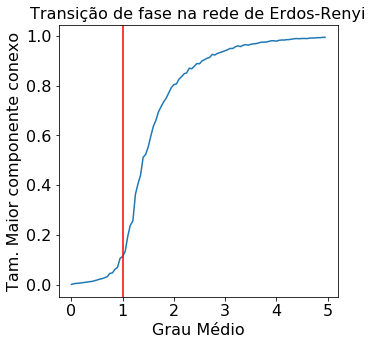

In [7]:
fig, axis = plt.subplots(1,1, figsize=(5,5))
sns.lineplot(x=ex2.index, y=ex2, ax=axis)
axis.set_title('Transição de fase na rede de Erdos-Renyi')
axis.set_xlabel('Grau Médio')
axis.set_ylabel('Tam. Maior componente conexo')
axis.axvline(x=1, color='red')
set_ax_fontsize(axis, 16)

Conforme esperado para a rede ER, as redes simuladas apresentaram componente gigante apenas quando $ \texttt{<}k\texttt{>} \geq1 $. Em outras palavras, o ponto de transição de fase é $\texttt{<}k\texttt{>}=1$

In [23]:
ex2 = pd.DataFrame(columns=['N','k','Avg.Short.Path', 'Real diameter', 'Theoretical Diameter'])
for k in [4, 10, 20, 30]:
    for n in range(100, 300, 10):
        p = k/(n-1)
        er = nx.gnp_random_graph(n=n, p=p, seed=None, directed=False)
        giant_comp = sorted(nx.connected_component_subgraphs(er), key = len, reverse=True)[0]
        short = nx.average_shortest_path_length(giant_comp)
        dmax = nx.diameter(giant_comp)
        avg_deg = len(giant_comp)/giant_comp.number_of_edges()
        #diam = np.abs(np.log(len(giant_comp))/np.log(avg_deg))
        theoretical = np.log(n)/np.log(k)
        ex2.loc[ex2.shape[0]] = [n, k, short, dmax, theoretical]
ex2;

Text(0.5, 1.0, 'Average shortest path x Diâmetro teórico')

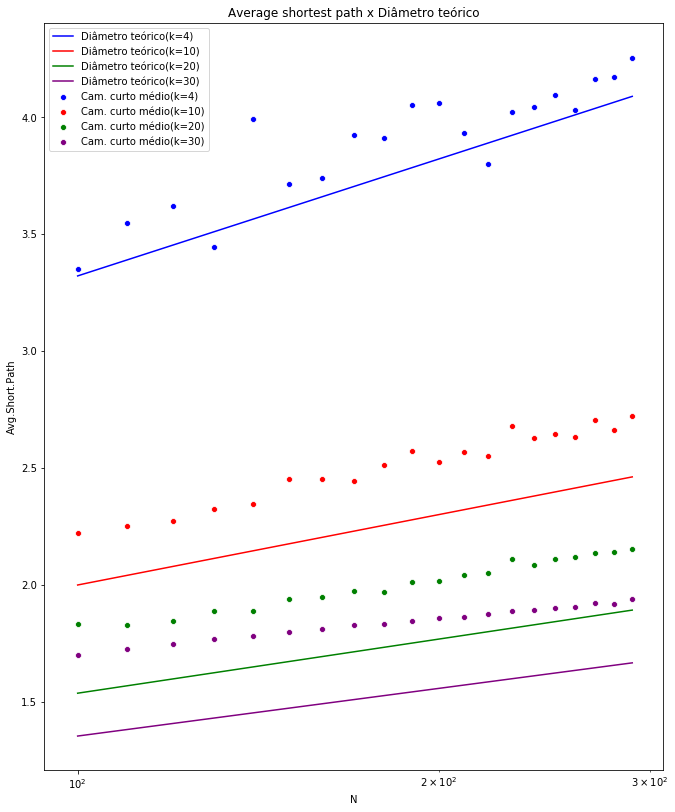

In [24]:
fig, axis = plt.subplots(1,1, figsize=(8,5))
plt.subplots_adjust(top=2.2, right=1.2)

#Calcular reta ao inves de usar a formula calculada com o diametro da rede

k_4 = ex2[ex2['k']==4]
#sns.scatterplot(x=k_4['N'], y=k_4['Real diameter'], ax=axis[0,0], label='Diâmetro real');
sns.lineplot(x=k_4['N'], y=k_4['Theoretical Diameter'], ax=axis, label='Diâmetro teórico(k=4)', color='blue')
g3 = sns.scatterplot(x=k_4['N'], y=k_4['Avg.Short.Path'], ax=axis, label='Cam. curto médio(k=4)', color='blue');
g3.set(xscale='log')

#xis[0,0].set_title('Diâmetro\nk=4')

k_10 = ex2[ex2['k'] == 10]
#sns.scatterplot(x=k_10['N'], y=k_10['Real diameter'], ax=axis[0,1], label='Diâmetro real');
sns.lineplot(x=k_10['N'], y=k_10['Theoretical Diameter'], ax=axis, label='Diâmetro teórico(k=10)', color='red')
g3 = sns.scatterplot(x=k_10['N'], y=k_10['Avg.Short.Path'], ax=axis, label='Cam. curto médio(k=10)', color='red');
g3.set(xscale='log')
#xis[0,0].set_title('Diâmetro\nk=10')

k_20 = ex2[ex2['k'] == 20]
#sns.scatterplot(x=k_20['N'], y=k_20['Real diameter'], ax=axis[1,0], label='Diâmetro real')
sns.lineplot(x=k_20['N'], y=k_20['Theoretical Diameter'], ax=axis, label='Diâmetro teórico(k=20)', color='green')
g3 = sns.scatterplot(x=k_20['N'], y=k_20['Avg.Short.Path'], ax=axis, label='Cam. curto médio(k=20)', color='green')
g3.set(xscale='log')
#xis[0,0].set_title('Diâmetro\nk=20')

k_30 = ex2[ex2['k'] == 30]
#sns.scatterplot(x=k_30['N'], y=k_30['Real diameter'], ax=axis[1,1], label='Diâmetro real')
sns.lineplot(x=k_30['N'], y=k_30['Theoretical Diameter'], ax=axis, label='Diâmetro teórico(k=30)', color='purple')
g3 = sns.scatterplot(x=k_30['N'], y=k_30['Avg.Short.Path'], ax=axis, label='Cam. curto médio(k=30)', color='purple')
g3.set(xscale='log')
#xis[0,0].set_title('Diâmetro\nk=30')

axis.set_title('Average shortest path x Diâmetro teórico')

Os gráficos sugerem que as redes ER apresentaram propriedade small world quando o grau médio $ <k> $ é baixo, visto que o average shortest path aproximou-se do diâmetro teórico. Contudo, nota-se que as duas medidas passaram a se afastar na medida que o grau médio foi aumentado. Isto faz sentido, dado que o aumento do grau médio implica que os nós terão maior conectividade e, portanto, maior número de caminhos para conectar dois pontos quaisquer. Entre estes novos caminhos, surgem novos caminhos mais curtos, fazendo com que as duas medidas divirjam. Em outras palavras, quanto mais densa a rede, menor é a distância entre os nós.

## Exercício 3

In [25]:
ex3_ws = pd.DataFrame(columns=['p','Mean vertex-vertex distance','Clustering','Variance'])
n = 100
k = 5
for index, p in enumerate(np.arange(0, 1, 0.01)):
    size = 30
    clusts = np.zeros(size)
    dists = np.zeros(size)
    varis = np.zeros(size)
    for i in range(size):
        ws = nx.watts_strogatz_graph(n, k, p, seed=None)
        dists[i] = nx.average_shortest_path_length(ws)
        clusts[i] = nx.average_clustering(ws)
        varis[i] = moment_of_degree_distribution(ws, 2)
    
    ex3_ws.loc[index] = [p, dists.mean(), clusts.mean(), varis.mean()]
ex3_ws

,p,Mean vertex-vertex distance,Clustering,Variance
0,0.00,12.878788,0.500000,16.000000
1,0.01,10.362263,0.487822,16.033333
2,0.02,8.349374,0.471889,16.087333
3,0.03,7.041933,0.456922,16.130667
4,0.04,6.676882,0.442233,16.164000
...,...,...,...,...
95,0.95,3.440801,0.031678,18.007333
96,0.96,3.437098,0.031560,17.988000
97,0.97,3.439852,0.034093,17.939333
98,0.98,3.455340,0.028200,17.854667


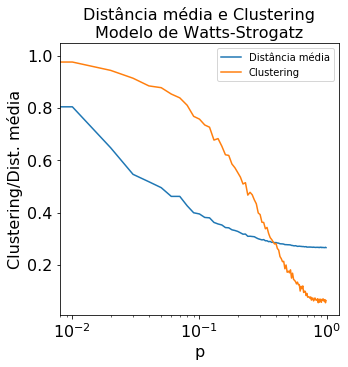

In [26]:
fig, axis = plt.subplots(1,1, figsize=(5,5))
dist = ex3_ws['Mean vertex-vertex distance']
dist = dist/dist.max()
cluster = ex3_ws['Clustering']
cluster = cluster/cluster.max()
sns.lineplot(x=ex3_ws['p'], y=dist, ax=axis, label='Distância média')
graph = sns.lineplot(x=ex3_ws['p'], y=cluster, ax=axis, label='Clustering')
graph.set(xscale='log')
axis.set_title('Distância média e Clustering\nModelo de Watts-Strogatz')
axis.set_ylabel('Clustering/Dist. média')
set_ax_fontsize(axis, 16)

A rede começa com coeficiente de clustering alto. Com valores pequenos da probabilidade de reconexão (p), nota-se que distância média decai drasticamente. Isto é possível consequência do surgimento do efeito small world, ou seja, a reconexão promove o surgimento de novos caminhos, enquanto a densidade da rede (refletida pelo coeficiente de clustering) permanece robusta. Contudo, com valores altos de P, a rede passa a se assemelhar a uma rede puramente aleatória, levando à queda também do coeficiente de clustering.

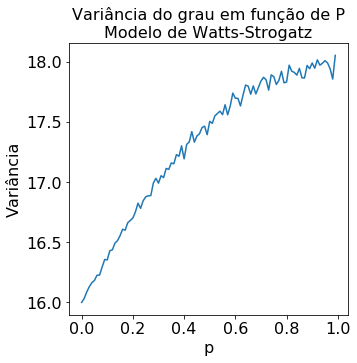

In [27]:
fig, axis = plt.subplots(1,1, figsize=(5,5))
sns.lineplot(x=ex3_ws['p'], y=ex3_ws['Variance'], ax=axis)
axis.set_title('Variância do grau em função de P\nModelo de Watts-Strogatz')
axis.set_ylabel('Variância')
set_ax_fontsize(axis, 16)

É notável o aumento da variância da distribuição de graus conforme P aumenta. É de se esperar que a rede gerada com maior grau de aleatoriedade nas reconexões leve a uma distribuição mais dispersa de graus, ou seja, em que há menos vértices com número de conexões em torno da média e maior variância para o grau.

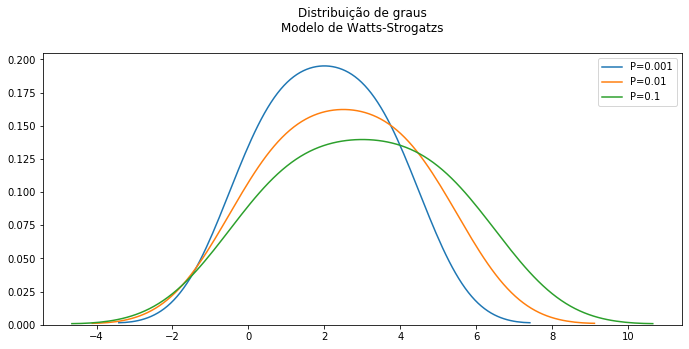

In [28]:
fig, axis = plt.subplots(1,1, figsize=(5,5))
plt.subplots_adjust(right=1.9)

n = 100
k = 5
for index, p in enumerate([0.001, 0.01, 0.1]):
    ws = nx.watts_strogatz_graph(n, k, p, seed=None)
    degrees, _ = degree_distribution(ws)
    axis.set_title('Distribuição de graus\nModelo de Watts-Strogatzs\n')
    sns.distplot(degrees, ax=axis, hist=False, label='P={}'.format(p))

Novamente, percebe-se que a distribuição de graus exibe maior dispersão conforme o parâmetro de rewiring p aumenta. Nota-se isso pela probabilidade mais baixa do nó ter grau igual á média e à maior abertura das caudas da distribuição.

In [85]:
ex3_lat = pd.DataFrame(columns=['Avg.Dist.1D','Avg.Dist.2D','Avg.Dist.3D','Avg.Dist.WS(p=0.001)',
                               'Avg.Dist.WS(p=0.01)','Avg.Dist.WS(p=0.1)','Avg.Dist.WS(p=1)'])
n = 1

for n in range(50,500,50):
    dims = np.array([n])
    grid_1d = nx.watts_strogatz_graph(n, 2, 0, seed=None) 
    
    dims = [int(n**(1/2)), int(n**(1/2))]
    grid_2d = nx.watts_strogatz_graph(n, 4, 0, seed=None)
    
    dims = [int(n**(1/3)), int(n**(1/3)), int(n**(1/3))]
    grid_3d = nx.watts_strogatz_graph(n, 6, 0, seed=None)
    
    #er_0001 = nx.gnp_random_graph(n=n, p=0.001, seed=None, directed=False)
    #er_001 = nx.gnp_random_graph(n=n, p=0.01, seed=None, directed=False)
    #er_01 = nx.gnp_random_graph(n=n, p=0.1, seed=None, directed=False)
    #er_1 = nx.gnp_random_graph(n=n, p=1, seed=None, directed=False)

    ws_0001 = nx.watts_strogatz_graph(n=n, k=30, p=0.001, seed=None)
    ws_001 = nx.watts_strogatz_graph(n=n, k=30, p=0.01, seed=None)
    ws_01 = nx.watts_strogatz_graph(n=n, k=30, p=0.1, seed=None)
    ws_1 = nx.watts_strogatz_graph(n=n, k=30, p=1, seed=None)
    
    
    giant_comp_0001 = sorted(nx.connected_component_subgraphs(ws_0001), key = len, reverse=True)[0] 
    giant_comp_001 = sorted(nx.connected_component_subgraphs(ws_001), key = len, reverse=True)[0] 
    giant_comp_01 = sorted(nx.connected_component_subgraphs(ws_01), key = len, reverse=True)[0] 
    giant_comp_1 = sorted(nx.connected_component_subgraphs(ws_1), key = len, reverse=True)[0] 
    
    diam_1d = nx.diameter(grid_1d)
    diam_2d = nx.diameter(grid_2d)
    diam_3d = nx.diameter(grid_3d)
    diam_rand0001 = nx.diameter(giant_comp_0001)
    diam_rand_001 = nx.diameter(giant_comp_001)
    diam_rand01 = nx.diameter(giant_comp_01)
    diam_rand1 = nx.diameter(giant_comp_1)
    #avg_1d = len(grid_1d)/grid_1d.number_of_edges()
    #avg_2d = len(grid_2d)/grid_1d.number_of_edges()
    #avg_3d = len(grid_3d)/grid_1d.number_of_edges()
    ex3_lat.loc[n] = [diam_1d, diam_2d, diam_3d, diam_rand0001, diam_rand_001, diam_rand01, diam_rand1]

ex3_lat = ex3_lat.astype('int32');

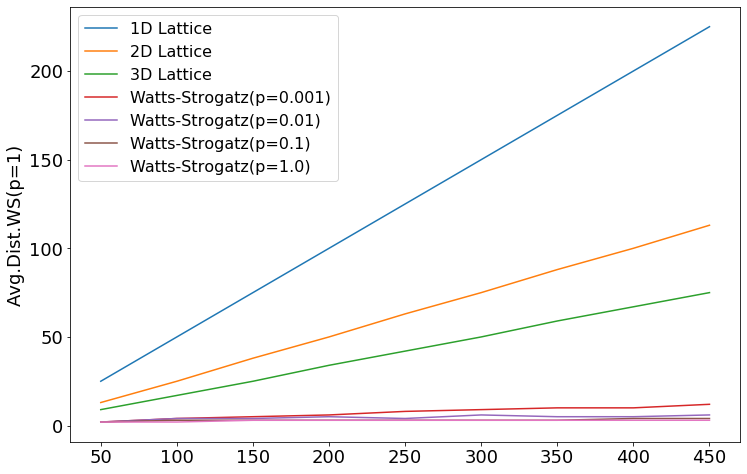

In [86]:
fig, axis = plt.subplots(1,1, figsize=(12,8))


sns.lineplot(x=ex3_lat['Avg.Dist.1D'].index,y=ex3_lat['Avg.Dist.1D'],ax=axis, label='1D Lattice')
sns.lineplot(x=ex3_lat['Avg.Dist.2D'].index,y=ex3_lat['Avg.Dist.2D'],ax=axis, label='2D Lattice')
sns.lineplot(x=ex3_lat['Avg.Dist.3D'].index,y=ex3_lat['Avg.Dist.3D'],ax=axis, label='3D Lattice')
sns.lineplot(x=ex3_lat['Avg.Dist.WS(p=0.001)'].index,y=ex3_lat['Avg.Dist.WS(p=0.001)'],ax=axis, 
             label='Watts-Strogatz(p=0.001)')
sns.lineplot(x=ex3_lat['Avg.Dist.WS(p=0.01)'].index,y=ex3_lat['Avg.Dist.WS(p=0.01)'],ax=axis, 
             label='Watts-Strogatz(p=0.01)')
sns.lineplot(x=ex3_lat['Avg.Dist.WS(p=0.1)'].index,y=ex3_lat['Avg.Dist.WS(p=0.1)'],ax=axis, 
             label='Watts-Strogatz(p=0.1)')
g = sns.lineplot(x=ex3_lat['Avg.Dist.WS(p=1)'].index,y=ex3_lat['Avg.Dist.WS(p=1)'],ax=axis, 
                 label='Watts-Strogatz(p=1.0)')
#g.set(xscale='log')

axis.legend(fontsize=16)
set_ax_fontsize(axis, 18)

As redes de grid foram geradas utilizando o modelo de Watts-Strogatz com probabilidade de rewiring zero, mudando entre uma e outra apenas o número de nós e quantidade de vizinhos por nó durante a inicialização. Observa-se que a rede 1D tem a distância média ampliada em escala linear, enquanto as distâncias médias das redes 2D e 3D seguem, respectivamente, raízes quadradas e cúbicas. Isto é esperado, visto que a configuração espacial dos vértices força o estabelecimento de caminhos por vias específicas. Por exemplo, na rede 1D os nós podem seguir em apenas duas direções, sendo, que, no pior caso, percorrerão todos os nós uma vez, resultando na escala linear observada.

Quanto às redes aleatórias, observa-se que que o aumento do número de nós não perturba a escala logaritmica da distância média, ainda que a mudança no valor de P pareça levar à estabilização mais rápida desta grandeza. Em outras palavras, nas redes aleatórias a distância média entre os nós é muito menor do que o tamanho da rede.

## Exercício 4

In [70]:
columns = ['N','Avg.Deg','2nd.Moment','Avg.Short.Path Length',
                            'Avg.Clustering','Transitivity','Assortativity','Model']

ex4_config = pd.DataFrame(columns=columns)
ex4_ba = pd.DataFrame(columns=columns)
ex4_mean = pd.DataFrame(columns=columns)
k = 5

    
for i in range(30):
    dist = (np.random.power(a=3, size=250)*k).astype(int)
    if(sum(dist) % 2 != 0):
        pos = np.random.randint(0, len(dist))
        dist[pos] = dist[pos]+ 1
    
    config = nx.Graph(nx.configuration_model(dist))
    giant_comp = sorted(nx.connected_component_subgraphs(config), key = len, reverse=True)[0]
    ex4_config.loc[i] = compute_statistics(giant_comp, 'Configuration')
    
    ba = nx.barabasi_albert_graph(250, int(k/2))
    ex4_ba.loc[i] = compute_statistics(ba, 'Barabasi-Albert')

ex4_mean.loc[0,:-1] = ex4_config.iloc[:,:-1].mean()
ex4_mean.iloc[0,-1] = ex4_config.iloc[0,-1]
ex4_mean.loc[1,:-1] = ex4_ba.iloc[:,:-1].mean()
ex4_mean.iloc[1,-1] = ex4_ba.iloc[0,-1]
ex4_mean

,N,Avg.Deg,2nd.Moment,Avg.Short.Path Length,Avg.Clustering,Transitivity,Assortativity,Model
0,247.633,3.21766,11.1671,5.28101,0.0066233,0.00735929,-0.00383819,Configuration
1,250,3.968,34.8573,3.46402,0.0730948,0.0300516,-0.142374,Barabasi-Albert


A rede baseada no configuration model foi gerada utilizando uma sequência de números aleatórios, os quais foram retirados da simulação de uma distribuição lei de potência de parâmetro $ \gamma = 3 $. 

Não houve diferença significativa de grau médio entre as redes geradas segundo cada modelo. No entanto, observa-se um distância média ligeiramente maior na rede do modelo de configuração, o que se deve à assortatividade próxima de 0. Isto faz com que os hubs nem sempre formem novas vias entre os nós periféricos, o que encurtaria a distância entre eles. Esta diferença de assortatividade entre as duas redes está no fato da rede Barabasi-Albert forçar ligações preferenciais de nós periféricos com hubs, o que não ocorre no modelo de configuração. Assim, é de esperar que a rede BA seja desassortativa e a rede CM não apresente tendência positiva ou negativa.

Com relação ao clustering e à transitividade, há diferença relativa entre as duas redes, ainda que em ambos os casos os coeficientes sejam baixos. Nota-se que o clustering da rede CM está na casa de 10e-3 e da rede BA de 10e-2, ambos próximos de zero, mas com uma ordem de grandeza entre si. Fenômeno semelhante pode ser observado na transitividade.

In [63]:
m = 10
max_df = pd.DataFrame(columns=['Max.Deg.0.5','Max.Deg.1','Max.Deg.1.5'])

for i in range(10, 100):
    simul_amount = 100
    
    max_05 = np.zeros(simul_amount)
    max_1 = np.zeros(simul_amount)
    max_15 = np.zeros(simul_amount)
    for j in range(simul_amount):
        ig_ba = ig.Graph()
        ig_ba = ig_ba.Barabasi(n=i, m=int(m/2), power=0.5)
        max_05[j] = max(ig_ba.degree())
        
        ig_ba = ig_ba.Barabasi(n=i, m=int(m/2), power=1)
        max_1[j] = max(ig_ba.degree())
    
        ig_ba = ig_ba.Barabasi(n=i, m=int(m/2), power=2.5)
        max_15[j] = max(ig_ba.degree())
    
    
    max_df.loc[i] = [max_05.mean(), max_1.mean(), max_15.mean()]

#max_df = ex4_df2.astype('int32')
max_df.apply(pd.to_numeric);

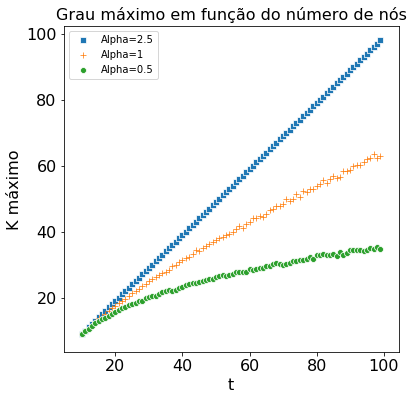

In [64]:
fig, axis = plt.subplots(1,1, figsize=(6,6))

sns.scatterplot(x=max_df.index, y=max_df['Max.Deg.1.5'], label='Alpha=2.5', marker='s');
sns.scatterplot(x=max_df.index, y=max_df['Max.Deg.1'], label='Alpha=1', marker='+')
sns.scatterplot(x=max_df.index, y=max_df['Max.Deg.0.5'], label='Alpha=0.5', marker='o')
axis.set_ylabel('K máximo')
axis.set_xlabel('t')
axis.set_title('Grau máximo em função do número de nós')
set_ax_fontsize(axis, 16)

A imagem acima ilustra o tamanho do maior hub para redes Barabasi-Albert não lineares com diferentes regras de ligação preferencial. No caso da ligação preferencial sublinear (alpha = 0.5), nota-se que o maior hub cresce de forma logaritmica. Isto pode ser explicado pelo fato que, ainda que com alpha > 0 os nós mais novos já tenham preferência por conectar-se aos hubs que já existem na rede, mas este viés ainda é fraco, o que limita o crescimento dos hubs.

No caso linear, temos o modelo usual de Barabasi-Albert. Observa-se, então, a formação de hubs que crescem gradualmente.

No caso superlinear, contudo, quase todos os nós se conectam aos hubs, promovendo o surgimento de um pequeno número de superhubs. Isto provoca o fenômeno observado, em que o tamanho do maior hub cresce linearmente com o tamanho da rede: é provável que todos os novos nós estejam se conectando a um mesmo superhub.

In [65]:
nl_stats = pd.DataFrame(columns=['N','Avg.Deg','2nd.Moment','Avg.Short.Path Length',
                            'Avg.Clustering','Transitivity','Assortativity','Model'])

n = 300
ba_05 = ig_ba.Barabasi(n=300, m=int(m/2), power=0.5)
ba_05.write_edgelist('ba_05.dat')
ba_05 = nx.read_edgelist('ba_05.dat')
nl_stats.loc[0] = compute_statistics(ba_05, 'Alpha=0.5')

ba_10 = ig_ba.Barabasi(n=300, m=int(m/2), power=1)
ba_10.write_edgelist('ba_10.dat')
ba_10 = nx.read_edgelist('ba_10.dat')
nl_stats.loc[1] = compute_statistics(ba_10, 'Alpha=1.0')

ba_15 = ig_ba.Barabasi(n=300, m=int(m/2), power=2.5)
ba_15.write_edgelist('ba_15.dat')
ba_15 = nx.read_edgelist('ba_15.dat')
nl_stats.loc[2] = compute_statistics(ba_15, 'Alpha=2.5')
nl_stats

,N,Avg.Deg,2nd.Moment,Avg.Short.Path Length,Avg.Clustering,Transitivity,Assortativity,Model
0,300,9.9,159.833333,2.631438,0.085371,0.077101,-0.041941,Alpha=0.5
1,300,9.9,383.986667,2.235541,0.379447,0.083724,-0.351573,Alpha=1.0
2,300,9.9,1512.646667,1.966890,0.983555,0.039395,-0.985264,Alpha=2.5


O grau médio foi o mesmo em todas as redes. Isto deve refletir o processo de geração da rede Barabasi-Albert, que leva o grau médio a ser o dobro do número de arestas de cada novo nó. Há semelhança também com o average shortest path, que não tem diferença significativa entre cada rede. Isto ocorre porque a maioria dos caminhos atravessará os hubs. Isto também é observado para a transitividade, que é praticamente nula em razão do fato que os novos nós conectam-se aos hubs, mas raramente formarão conexões entre si em função da ligação preferencial.

O segundo momento, o clustering e a assortatividade, no entanto, apresentaram diferenças substanciais entre cada rede. Isto é provável influência da maior predominância dos superhubs conforme se aumenta o valor de alpha. No caso do segundo momento, o pequeno número de hubs que exercem enorme influência para valores mais altos de alpha são responsáveis pelo crescimento da variância. O mesmo vale para o clustering e a assortatividade (que, no caso, indica desassortatividade). Como os novos nós eventualmente passarão a conectar-se com os mesmos superhubs, será possível notar maior adensamento e maior tendência de nós pouco conectados ligarem-se a nós muito conectados.

## Exercício 5

Neste exercício, será feita a classificação da rede formada pelos personagens dos livros da série A Song of Ice and Fire (Game of Thrones). Nesta rede, os vértices são personagens e as arestas entre eles são não direcionadas e ponderadas, e indicam o número de vezes em que os personagens são citados conjuntamente dentro de um intervalo de 15 palavras. 

A rede será classificada dentre 3 modelos de redes aleatórias, Erdos-Renyi, Watts-Strogatz e Barabasi-Albert linear. Estas redes serão geradas com o número de nós e o grau médio da rede Game of Thrones. A classificação será realizada por meio do algoritmo KNN, utilizando as estatísticas computadas: segundo momento da distribuição de graus, shortest path médio, clustering médio, transitividade e assortatividade.

In [71]:
asoiaf = nx.Graph()
asoiaf_df = pd.read_csv('../datasets/asoiaf/data/asoiaf-all-edges.csv')
asoiaf.add_edges_from([tuple(x) for x in asoiaf_df[['Source','Target']].values])
asoiaf = asoiaf.to_undirected()

columns = ['n','<k>','2nd.Mom.','Avg.Short.Path','Avg.Clustering','Transitivity','Assortativity','Model']

asoiaf_stats = pd.DataFrame(columns=columns)
asoiaf_stats.loc[0,:] = compute_statistics(asoiaf,'got')
#asoiaf_stats = [asoiaf_stats[:-1]]

n = asoiaf_stats.iloc[0,0]
k = asoiaf_stats.iloc[0,1]
asoiaf_stats

,n,<k>,2nd.Mom.,Avg.Short.Path,Avg.Clustering,Transitivity,Assortativity,Model
0,796,7.09296,211.008,3.41623,0.485862,0.209037,-0.115391,got


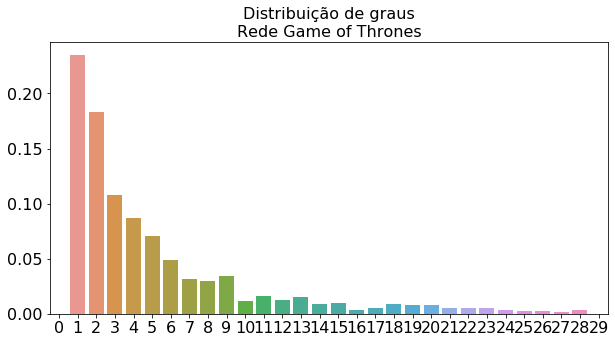

In [72]:
fig, axis = plt.subplots(1,1, figsize=(10,5))
k_asoiaf, pk_asoiaf = degree_distribution(asoiaf)

pk_asoiaf = [x for i, x in enumerate(pk_asoiaf) if k_asoiaf[i] < 30]
k_asoiaf = [x for i, x in enumerate(k_asoiaf) if k_asoiaf[i] < 30]

axis.set_title('Distribuição de graus\nRede Game of Thrones')
sns.barplot(x=k_asoiaf, y=pk_asoiaf, ax=axis);
set_ax_fontsize(axis, 16)

Com base na distribuição de graus da amostra da rede Game of Thrones, é plausível esperar que ela apresente comportamento de uma rede livre de escala. Em outras palavras, a classificação esperada para esta rede é Barabasi-Albert. 

In [76]:
net_df = pd.DataFrame(columns=['n','Avg.Deg.','2nd.Mom.','Avg.Short.Path','Avg.Clustering',
                               'Transitivity','Assortativity','Model'])
#Refazer gerando as redes usando as propriedades N e k da rede do got
#k = 10
#n = 1000
p = k/(n-1)
for i in range(10):
    er = nx.gnp_random_graph(n=n, p=p, seed=None, directed=False)
    er = sorted(nx.connected_component_subgraphs(er), key = len, reverse=True)[0]
    net_df.loc[i] = compute_statistics(er, 'Erdos-Renyi')

#n = 1000
p = 0.01
#k = 10
for i in range(10, 20):
    ws = nx.watts_strogatz_graph(n, int(k), p, seed=None)
    ws = sorted(nx.connected_component_subgraphs(ws), key = len, reverse=True)[0]
    net_df.loc[i] = compute_statistics(ws, 'Watts-Strogatz')
    
#n = 1000
p = 0.1
#k = 10
for i in range(20, 30):
    ba = nx.barabasi_albert_graph(n, int(k/2))
    net_df.loc[i] = compute_statistics(ba, 'Barabasi-Albert')

target = net_df['Model']
net_df = net_df.drop('Model', axis=1)

net_df

,n,Avg.Deg.,2nd.Mom.,Avg.Short.Path,Avg.Clustering,Transitivity,Assortativity
0,795,7.101887,57.305660,3.626748,0.009673,0.009621,-0.023813
1,795,7.182390,58.950943,3.609131,0.011067,0.009185,-0.003260
2,796,6.929648,54.577889,3.670301,0.006055,0.006486,-0.024120
3,795,6.817610,52.945912,3.695832,0.009967,0.009326,-0.001629
4,796,7.384422,61.432161,3.567375,0.007584,0.008507,0.015574
5,795,7.084277,56.528302,3.639919,0.009753,0.008548,0.034446
6,796,7.055276,57.148241,3.635479,0.008636,0.008727,0.021891
7,796,7.180905,58.703518,3.608246,0.008525,0.007900,0.004874
8,792,7.184343,58.691919,3.605199,0.009818,0.009707,0.006924
9,796,7.108040,57.414573,3.629626,0.008656,0.009440,0.030317


In [77]:
encoder = sklearn.preprocessing.LabelEncoder()
enc_target = encoder.fit_transform(target)

scaler = sklearn.preprocessing.Normalizer()
sc_df = pd.DataFrame(scaler.fit_transform(net_df))

knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(sc_df, enc_target)
knn.score(sc_df, enc_target)

1.0

In [78]:
asoiaf_stats_ = asoiaf_stats.iloc[:,:-1]
sc_asoiaf = scaler.transform(asoiaf_stats_)
target_asoiaf = knn.predict(sc_asoiaf)
print('Classe da rede dos personagens de game of thrones:', encoder.inverse_transform(target_asoiaf))

Classe da rede dos personagens de game of thrones: ['Barabasi-Albert']


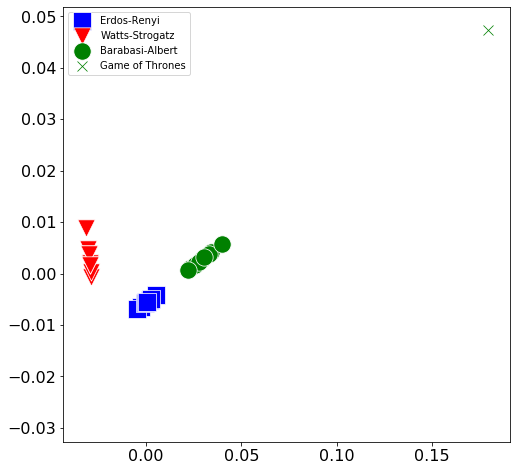

In [79]:
pca = sklearn.decomposition.PCA(n_components=2)
transf_df = pca.fit_transform(sc_df)
transf_asoiaf = pca.transform(sc_asoiaf)

fig, axis = plt.subplots(1,1, figsize=(8,8))

sns.scatterplot(x=transf_df[target == 'Erdos-Renyi'][:,0], y=transf_df[target=='Erdos-Renyi'][:,1], 
                ax=axis, label='Erdos-Renyi', marker='s', color='blue', s=300)
sns.scatterplot(x=transf_df[target == 'Watts-Strogatz'][:,0], y=transf_df[target=='Watts-Strogatz'][:,1], 
                ax=axis, label='Watts-Strogatz', marker='v', color='red', s=300)
sns.scatterplot(x=transf_df[target == 'Barabasi-Albert'][:,0], y=transf_df[target=='Barabasi-Albert'][:,1], 
                ax=axis, label='Barabasi-Albert', marker='o', color='green', s=300)
sns.scatterplot(x=transf_asoiaf[:,0], y=transf_asoiaf[:,1], ax=axis, label='Game of Thrones', marker='x',
               color='green', s=100)

set_ax_fontsize(axis, 16)

O gráfico acima utiliza as estatísticas padronizadas de cada rede como coordenadas, depois que foram reduzidas para duas dimensões utilizando Análise de componentes principais (PCA). A classificação foi feita com as estatísticas padronizadas, mas sem a redução do PCA. É possível observar que a rede Game of Thrones, ainda que distante de todas as redes aleatórias, está menos distante das redes Barabasi-Albert, e assim ela foi classificada, conforme era esperado.